In [1]:
# Import dependencies
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Store filepath in a variable
file = Path("FARS2021NationalCSV/accident.csv")
accidents_df = pd.read_csv(file, encoding="ANSI")
pd.set_option('display.max_columns', None)

# Remove unnecessary columns from the DataFrame and save the new DataFrame
trimed_df = accidents_df[["STATE", "STATENAME", "ST_CASE", "COUNTY", "COUNTYNAME", "MONTH","MONTHNAME", 
                      "DAY", "DAYNAME", "DAY_WEEK", "DAY_WEEKNAME", "YEAR", "HOUR", "HOURNAME", "MINUTE", 
                      "MINUTENAME", "LATITUDE", "LATITUDENAME", "LONGITUD", "LONGITUDNAME", "LGT_COND", 
                      "LGT_CONDNAME", "WEATHER", "WEATHERNAME", "FATALS"]]

# Rename the headers to be more explanatory
updated_df = trimed_df.rename(columns={"STATE": "State_Code", "STATENAME": "State", "ST_CASE": "Case_Number", 
                                "COUNTY": "County_Code", "COUNTYNAME": "County", "MONTH": "Monthid",
                                "MONTHNAME": "Month", "DAY": "Day", "DAYNAME": "Day_of_Month", "DAY_WEEK": "Day_of_Week",
                                "DAY_WEEKNAME": "Weekday", "YEAR": "Year", "HOUR": "Hour", "HOURNAME": "Hour_Range",
                                "MINUTE": "Minute", "MINUTENAME": "Minute_Digit", "LATITUDE": "Latitude",
                                "LATITUDENAME": "Latitudeinfo", "LONGITUD": "Longitude", "LONGITUDNAME": "Longitudeinfo",
                                "LGT_COND": "Light_Conditionid", "LGT_CONDNAME": "Light_Condition", 
                                "WEATHER": "Weatherid", "WEATHERNAME": "Weather_Condition", "FATALS": "Number_of_Deaths" })

# Filter data to display only the state of North Carolina
ncstate_df = updated_df.loc[(updated_df["State_Code"] == 37) , :]

ncstate_df.head(5)


,State_Code,State,Case_Number,County_Code,County,Monthid,Month,Day,Day_of_Month,Day_of_Week,Weekday,Year,Hour,Hour_Range,Minute,Minute_Digit,Latitude,Latitudeinfo,Longitude,Longitudeinfo,Light_Conditionid,Light_Condition,Weatherid,Weather_Condition,Number_of_Deaths
24857,37,North Carolina,370001,1,ALAMANCE (1),1,January,6,6,4,Wednesday,2021,14,2:00pm-2:59pm,17,17,36.064589,36.064589,-79.523144,-79.523144,1,Daylight,1,Clear,1
24858,37,North Carolina,370002,1,ALAMANCE (1),1,January,17,17,1,Sunday,2021,15,3:00pm-3:59pm,40,40,36.097139,36.097139,-79.272444,-79.272444,1,Daylight,1,Clear,2
24859,37,North Carolina,370003,3,ALEXANDER (3),1,January,2,2,7,Saturday,2021,19,7:00pm-7:59pm,16,16,36.026417,36.026417,-81.189797,-81.189797,2,Dark - Not Lighted,5,"Fog, Smog, Smoke",1
24860,37,North Carolina,370004,3,ALEXANDER (3),1,January,9,9,7,Saturday,2021,19,7:00pm-7:59pm,12,12,35.902472,35.902472,-81.243419,-81.243419,2,Dark - Not Lighted,1,Clear,1
24861,37,North Carolina,370005,7,ANSON (7),1,January,3,3,1,Sunday,2021,0,0:00am-0:59am,6,6,35.087317,35.087317,-80.223214,-80.223214,2,Dark - Not Lighted,2,Rain,1


In [3]:
ncstate_df.count()

State_Code           1535
State                1535
Case_Number          1535
County_Code          1535
County               1535
Monthid              1535
Month                1535
Day                  1535
Day_of_Month         1535
Day_of_Week          1535
Weekday              1535
Year                 1535
Hour                 1535
Hour_Range           1535
Minute               1535
Minute_Digit         1535
Latitude             1535
Latitudeinfo         1535
Longitude            1535
Longitudeinfo        1535
Light_Conditionid    1535
Light_Condition      1535
Weatherid            1535
Weather_Condition    1535
Number_of_Deaths     1535
dtype: int64

In [4]:
filtered_df = ncstate_df[ncstate_df['Hour_Range'] == "Unknown Hours"]
 
# Display the first 15 rows of the filtered DataFrame
filtered_df.head(5)

,State_Code,State,Case_Number,County_Code,County,Monthid,Month,Day,Day_of_Month,Day_of_Week,Weekday,Year,Hour,Hour_Range,Minute,Minute_Digit,Latitude,Latitudeinfo,Longitude,Longitudeinfo,Light_Conditionid,Light_Condition,Weatherid,Weather_Condition,Number_of_Deaths
24990,37,North Carolina,370136,43,CLAY (43),2,February,26,26,6,Friday,2021,99,Unknown Hours,99,Unknown Minutes,35.035628,35.035628,-83.819903,-83.819903,2,Dark - Not Lighted,2,Rain,1
25208,37,North Carolina,370357,81,GUILFORD (81),4,April,6,6,3,Tuesday,2021,99,Unknown Hours,99,Unknown Minutes,35.948942,35.948942,-79.899497,-79.899497,9,Reported as Unknown,1,Clear,1
26356,37,North Carolina,371520,193,WILKES (193),6,June,5,5,7,Saturday,2021,99,Unknown Hours,99,Unknown Minutes,36.149217,36.149217,-81.178047,-81.178047,2,Dark - Not Lighted,1,Clear,2


In [5]:
indexhourrange = ncstate_df[ncstate_df['Hour_Range'] == "Unknown Hours"].index
ncstate_df.drop(indexhourrange, inplace=True)
ncstate_df.count()

State_Code           1532
State                1532
Case_Number          1532
County_Code          1532
County               1532
Monthid              1532
Month                1532
Day                  1532
Day_of_Month         1532
Day_of_Week          1532
Weekday              1532
Year                 1532
Hour                 1532
Hour_Range           1532
Minute               1532
Minute_Digit         1532
Latitude             1532
Latitudeinfo         1532
Longitude            1532
Longitudeinfo        1532
Light_Conditionid    1532
Light_Condition      1532
Weatherid            1532
Weather_Condition    1532
Number_of_Deaths     1532
dtype: int64

In [6]:
ncstate_df[['Start_Hour', 'End_Hour']] = ncstate_df['Hour_Range'].str.split('-', expand=True)
ncstate_df.head(5)

,State_Code,State,Case_Number,County_Code,County,Monthid,Month,Day,Day_of_Month,Day_of_Week,Weekday,Year,Hour,Hour_Range,Minute,Minute_Digit,Latitude,Latitudeinfo,Longitude,Longitudeinfo,Light_Conditionid,Light_Condition,Weatherid,Weather_Condition,Number_of_Deaths,Start_Hour,End_Hour
24857,37,North Carolina,370001,1,ALAMANCE (1),1,January,6,6,4,Wednesday,2021,14,2:00pm-2:59pm,17,17,36.064589,36.064589,-79.523144,-79.523144,1,Daylight,1,Clear,1,2:00pm,2:59pm
24858,37,North Carolina,370002,1,ALAMANCE (1),1,January,17,17,1,Sunday,2021,15,3:00pm-3:59pm,40,40,36.097139,36.097139,-79.272444,-79.272444,1,Daylight,1,Clear,2,3:00pm,3:59pm
24859,37,North Carolina,370003,3,ALEXANDER (3),1,January,2,2,7,Saturday,2021,19,7:00pm-7:59pm,16,16,36.026417,36.026417,-81.189797,-81.189797,2,Dark - Not Lighted,5,"Fog, Smog, Smoke",1,7:00pm,7:59pm
24860,37,North Carolina,370004,3,ALEXANDER (3),1,January,9,9,7,Saturday,2021,19,7:00pm-7:59pm,12,12,35.902472,35.902472,-81.243419,-81.243419,2,Dark - Not Lighted,1,Clear,1,7:00pm,7:59pm
24861,37,North Carolina,370005,7,ANSON (7),1,January,3,3,1,Sunday,2021,0,0:00am-0:59am,6,6,35.087317,35.087317,-80.223214,-80.223214,2,Dark - Not Lighted,2,Rain,1,0:00am,0:59am


In [7]:
# Push the North Carolina DataFrame to a new CSV file
ncstate_df.to_csv("NorthCarolina_Accidents2021.csv",
                  encoding="utf-8", index=False, header=True)

In [8]:
# Store filepath in a variable
file = Path("FARS2020NationalCSV/accident.csv")
accidents_df = pd.read_csv(file, encoding="ANSI")
pd.set_option('display.max_columns', None)

# Remove unnecessary columns from the DataFrame and save the new DataFrame
trimed_df = accidents_df[["STATE", "STATENAME", "ST_CASE", "COUNTY", "COUNTYNAME", "MONTH","MONTHNAME", 
                      "DAY", "DAYNAME", "DAY_WEEK", "DAY_WEEKNAME", "YEAR", "HOUR", "HOURNAME", "MINUTE", 
                      "MINUTENAME", "LATITUDE", "LATITUDENAME", "LONGITUD", "LONGITUDNAME", "LGT_COND", 
                      "LGT_CONDNAME", "WEATHER", "WEATHERNAME", "FATALS"]]

# Rename the headers to be more explanatory
updated_df = trimed_df.rename(columns={"STATE": "State_Code", "STATENAME": "State", "ST_CASE": "Case_Number", 
                                "COUNTY": "County_Code", "COUNTYNAME": "County", "MONTH": "Monthid",
                                "MONTHNAME": "Month", "DAY": "Day", "DAYNAME": "Day_of_Month", "DAY_WEEK": "Day_of_Week",
                                "DAY_WEEKNAME": "Weekday", "YEAR": "Year", "HOUR": "Hour", "HOURNAME": "Hour_Range",
                                "MINUTE": "Minute", "MINUTENAME": "Minute_Digit", "LATITUDE": "Latitude",
                                "LATITUDENAME": "Latitudeinfo", "LONGITUD": "Longitude", "LONGITUDNAME": "Longitudeinfo",
                                "LGT_COND": "Light_Conditionid", "LGT_CONDNAME": "Light_Condition", 
                                "WEATHER": "Weatherid", "WEATHERNAME": "Weather_Condition", "FATALS": "Number_of_Deaths" })

# Filter data to display only the state of North Carolina
ncstate_df = updated_df.loc[(updated_df["State_Code"] == 37) , :]

ncstate_df.head(5)

,State_Code,State,Case_Number,County_Code,County,Monthid,Month,Day,Day_of_Month,Day_of_Week,Weekday,Year,Hour,Hour_Range,Minute,Minute_Digit,Latitude,Latitudeinfo,Longitude,Longitudeinfo,Light_Conditionid,Light_Condition,Weatherid,Weather_Condition,Number_of_Deaths
22776,37,North Carolina,370001,1,ALAMANCE (1),1,January,12,12,1,Sunday,2020,2,2:00am-2:59am,36,36,36.068889,36.068889,-79.347594,-79.347594,2,Dark - Not Lighted,2,Rain,1
22777,37,North Carolina,370002,1,ALAMANCE (1),1,January,31,31,6,Friday,2020,6,6:00am-6:59am,3,3,36.095608,36.095608,-79.429208,-79.429208,3,Dark - Lighted,2,Rain,1
22778,37,North Carolina,370003,1,ALAMANCE (1),1,January,1,1,4,Wednesday,2020,1,1:00am-1:59am,19,19,35.868572,35.868572,-79.428067,-79.428067,2,Dark - Not Lighted,1,Clear,1
22779,37,North Carolina,370004,3,ALEXANDER (3),1,January,7,7,3,Tuesday,2020,12,12:00pm-12:59pm,41,41,35.922769,35.922769,-81.261103,-81.261103,1,Daylight,1,Clear,1
22780,37,North Carolina,370005,7,ANSON (7),1,January,24,24,6,Friday,2020,11,11:00am-11:59am,50,50,34.879358,34.879358,-80.159050,-80.159050,1,Daylight,10,Cloudy,1


In [9]:
ncstate_df.count()

State_Code           1415
State                1415
Case_Number          1415
County_Code          1415
County               1415
Monthid              1415
Month                1415
Day                  1415
Day_of_Month         1415
Day_of_Week          1415
Weekday              1415
Year                 1415
Hour                 1415
Hour_Range           1415
Minute               1415
Minute_Digit         1415
Latitude             1415
Latitudeinfo         1415
Longitude            1415
Longitudeinfo        1415
Light_Conditionid    1415
Light_Condition      1415
Weatherid            1415
Weather_Condition    1415
Number_of_Deaths     1415
dtype: int64

In [10]:
filtered_df = ncstate_df[ncstate_df['Hour_Range'] == "Unknown Hours"]
 
# Display the first 15 rows of the filtered DataFrame
filtered_df.head(5)

,State_Code,State,Case_Number,County_Code,County,Monthid,Month,Day,Day_of_Month,Day_of_Week,Weekday,Year,Hour,Hour_Range,Minute,Minute_Digit,Latitude,Latitudeinfo,Longitude,Longitudeinfo,Light_Conditionid,Light_Condition,Weatherid,Weather_Condition,Number_of_Deaths
23526,37,North Carolina,370753,93,HOKE (93),7,July,19,19,1,Sunday,2020,99,Unknown Hours,99,Unknown Minutes,34.964617,34.964617,-79.207328,-79.207328,1,Daylight,1,Clear,1
23653,37,North Carolina,370882,155,ROBESON (155),7,July,15,15,4,Wednesday,2020,99,Unknown Hours,99,Unknown Minutes,34.516092,34.516092,-79.302228,-79.302228,1,Daylight,1,Clear,1


In [11]:
indexhourrange = ncstate_df[ncstate_df['Hour_Range'] == "Unknown Hours"].index
ncstate_df.drop(indexhourrange, inplace=True)
ncstate_df.count()

State_Code           1413
State                1413
Case_Number          1413
County_Code          1413
County               1413
Monthid              1413
Month                1413
Day                  1413
Day_of_Month         1413
Day_of_Week          1413
Weekday              1413
Year                 1413
Hour                 1413
Hour_Range           1413
Minute               1413
Minute_Digit         1413
Latitude             1413
Latitudeinfo         1413
Longitude            1413
Longitudeinfo        1413
Light_Conditionid    1413
Light_Condition      1413
Weatherid            1413
Weather_Condition    1413
Number_of_Deaths     1413
dtype: int64

In [12]:
ncstate_df[['Start_Hour', 'End_Hour']] = ncstate_df['Hour_Range'].str.split('-', expand=True)
ncstate_df.head(5)

,State_Code,State,Case_Number,County_Code,County,Monthid,Month,Day,Day_of_Month,Day_of_Week,Weekday,Year,Hour,Hour_Range,Minute,Minute_Digit,Latitude,Latitudeinfo,Longitude,Longitudeinfo,Light_Conditionid,Light_Condition,Weatherid,Weather_Condition,Number_of_Deaths,Start_Hour,End_Hour
22776,37,North Carolina,370001,1,ALAMANCE (1),1,January,12,12,1,Sunday,2020,2,2:00am-2:59am,36,36,36.068889,36.068889,-79.347594,-79.347594,2,Dark - Not Lighted,2,Rain,1,2:00am,2:59am
22777,37,North Carolina,370002,1,ALAMANCE (1),1,January,31,31,6,Friday,2020,6,6:00am-6:59am,3,3,36.095608,36.095608,-79.429208,-79.429208,3,Dark - Lighted,2,Rain,1,6:00am,6:59am
22778,37,North Carolina,370003,1,ALAMANCE (1),1,January,1,1,4,Wednesday,2020,1,1:00am-1:59am,19,19,35.868572,35.868572,-79.428067,-79.428067,2,Dark - Not Lighted,1,Clear,1,1:00am,1:59am
22779,37,North Carolina,370004,3,ALEXANDER (3),1,January,7,7,3,Tuesday,2020,12,12:00pm-12:59pm,41,41,35.922769,35.922769,-81.261103,-81.261103,1,Daylight,1,Clear,1,12:00pm,12:59pm
22780,37,North Carolina,370005,7,ANSON (7),1,January,24,24,6,Friday,2020,11,11:00am-11:59am,50,50,34.879358,34.879358,-80.159050,-80.159050,1,Daylight,10,Cloudy,1,11:00am,11:59am


In [13]:
# Push the North Carolina DataFrame to a new CSV file
ncstate_df.to_csv("NorthCarolina_Accidents2020.csv",
                  encoding="utf-8", index=False, header=True)

In [14]:
# Store filepath in a variable
file = Path("FARS2019NationalCSV/accident.csv")
accidents_df = pd.read_csv(file, encoding="ANSI")
pd.set_option('display.max_columns', None)

# Remove unnecessary columns from the DataFrame and save the new DataFrame
trimed_df = accidents_df[["STATE", "STATENAME", "ST_CASE", "COUNTY", "COUNTYNAME", "MONTH","MONTHNAME", 
                      "DAY", "DAYNAME", "DAY_WEEK", "DAY_WEEKNAME", "YEAR", "HOUR", "HOURNAME", "MINUTE", 
                      "MINUTENAME", "LATITUDE", "LATITUDENAME", "LONGITUD", "LONGITUDNAME", "LGT_COND", 
                      "LGT_CONDNAME", "WEATHER", "WEATHERNAME", "FATALS"]]

# Rename the headers to be more explanatory
updated_df = trimed_df.rename(columns={"STATE": "State_Code", "STATENAME": "State", "ST_CASE": "Case_Number", 
                                "COUNTY": "County_Code", "COUNTYNAME": "County", "MONTH": "Monthid",
                                "MONTHNAME": "Month", "DAY": "Day", "DAYNAME": "Day_of_Month", "DAY_WEEK": "Day_of_Week",
                                "DAY_WEEKNAME": "Weekday", "YEAR": "Year", "HOUR": "Hour", "HOURNAME": "Hour_Range",
                                "MINUTE": "Minute", "MINUTENAME": "Minute_Digit", "LATITUDE": "Latitude",
                                "LATITUDENAME": "Latitudeinfo", "LONGITUD": "Longitude", "LONGITUDNAME": "Longitudeinfo",
                                "LGT_COND": "Light_Conditionid", "LGT_CONDNAME": "Light_Condition", 
                                "WEATHER": "Weatherid", "WEATHERNAME": "Weather_Condition", "FATALS": "Number_of_Deaths" })

# Filter data to display only the state of North Carolina
ncstate_df = updated_df.loc[(updated_df["State_Code"] == 37) , :]

ncstate_df.head(5)

,State_Code,State,Case_Number,County_Code,County,Monthid,Month,Day,Day_of_Month,Day_of_Week,Weekday,Year,Hour,Hour_Range,Minute,Minute_Digit,Latitude,Latitudeinfo,Longitude,Longitudeinfo,Light_Conditionid,Light_Condition,Weatherid,Weather_Condition,Number_of_Deaths
21115,37,North Carolina,370001,15,BERTIE (15),1,January,5,5,7,Saturday,2019,23,11:00pm-11:59pm,47,47,36.206192,36.20619167,-76.848658,-76.84865833,2,Dark - Not Lighted,1,Clear,1
21116,37,North Carolina,370002,15,BERTIE (15),1,January,17,17,5,Thursday,2019,6,6:00am-6:59am,44,44,36.099342,36.09934167,-77.113547,-77.11354722,1,Daylight,10,Cloudy,1
21117,37,North Carolina,370003,19,BRUNSWICK (19),1,January,17,17,5,Thursday,2019,14,2:00pm-2:59pm,54,54,33.967339,33.96733889,-78.306081,-78.30608056,1,Daylight,1,Clear,1
21118,37,North Carolina,370004,23,BURKE (23),1,January,15,15,3,Tuesday,2019,12,12:00pm-12:59pm,38,38,35.718150,35.71815,-81.753439,-81.75343889,1,Daylight,1,Clear,1
21119,37,North Carolina,370005,35,CATAWBA (35),1,January,24,24,5,Thursday,2019,0,0:00am-0:59am,30,30,35.702067,35.70206667,-81.211678,-81.21167778,2,Dark - Not Lighted,2,Rain,1


In [15]:
ncstate_df.count()

State_Code           1358
State                1358
Case_Number          1358
County_Code          1358
County               1358
Monthid              1358
Month                1358
Day                  1358
Day_of_Month         1358
Day_of_Week          1358
Weekday              1358
Year                 1358
Hour                 1358
Hour_Range           1358
Minute               1358
Minute_Digit         1358
Latitude             1358
Latitudeinfo         1358
Longitude            1358
Longitudeinfo        1358
Light_Conditionid    1358
Light_Condition      1358
Weatherid            1358
Weather_Condition    1358
Number_of_Deaths     1358
dtype: int64

In [17]:
ncstate_df[['Start_Hour', 'End_Hour']] = ncstate_df['Hour_Range'].str.split('-', expand=True)
ncstate_df.head(5)

,State_Code,State,Case_Number,County_Code,County,Monthid,Month,Day,Day_of_Month,Day_of_Week,Weekday,Year,Hour,Hour_Range,Minute,Minute_Digit,Latitude,Latitudeinfo,Longitude,Longitudeinfo,Light_Conditionid,Light_Condition,Weatherid,Weather_Condition,Number_of_Deaths,Start_Hour,End_Hour
21115,37,North Carolina,370001,15,BERTIE (15),1,January,5,5,7,Saturday,2019,23,11:00pm-11:59pm,47,47,36.206192,36.20619167,-76.848658,-76.84865833,2,Dark - Not Lighted,1,Clear,1,11:00pm,11:59pm
21116,37,North Carolina,370002,15,BERTIE (15),1,January,17,17,5,Thursday,2019,6,6:00am-6:59am,44,44,36.099342,36.09934167,-77.113547,-77.11354722,1,Daylight,10,Cloudy,1,6:00am,6:59am
21117,37,North Carolina,370003,19,BRUNSWICK (19),1,January,17,17,5,Thursday,2019,14,2:00pm-2:59pm,54,54,33.967339,33.96733889,-78.306081,-78.30608056,1,Daylight,1,Clear,1,2:00pm,2:59pm
21118,37,North Carolina,370004,23,BURKE (23),1,January,15,15,3,Tuesday,2019,12,12:00pm-12:59pm,38,38,35.718150,35.71815,-81.753439,-81.75343889,1,Daylight,1,Clear,1,12:00pm,12:59pm
21119,37,North Carolina,370005,35,CATAWBA (35),1,January,24,24,5,Thursday,2019,0,0:00am-0:59am,30,30,35.702067,35.70206667,-81.211678,-81.21167778,2,Dark - Not Lighted,2,Rain,1,0:00am,0:59am


In [18]:
# Push the North Carolina DataFrame to a new CSV file
ncstate_df.to_csv("NorthCarolina_Accidents2019.csv",
                  encoding="utf-8", index=False, header=True)

In [20]:
#import the weekday fatality data gathered from sql
weekday_df = pd.read_csv("SQL/weekday_fatalities.csv")
weekday_df.head()

,weekday,count,day_of_week
0,Sunday,246,1
1,Monday,209,2
2,Tuesday,171,3
3,Wednesday,190,4
4,Thursday,197,5


In [21]:
# Remove unnecessary columns from the DataFrame and save the new DataFrame
trimed_df = weekday_df[["weekday", "count"]]
trimed_df.head()

,weekday,count
0,Sunday,246
1,Monday,209
2,Tuesday,171
3,Wednesday,190
4,Thursday,197


<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, *, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

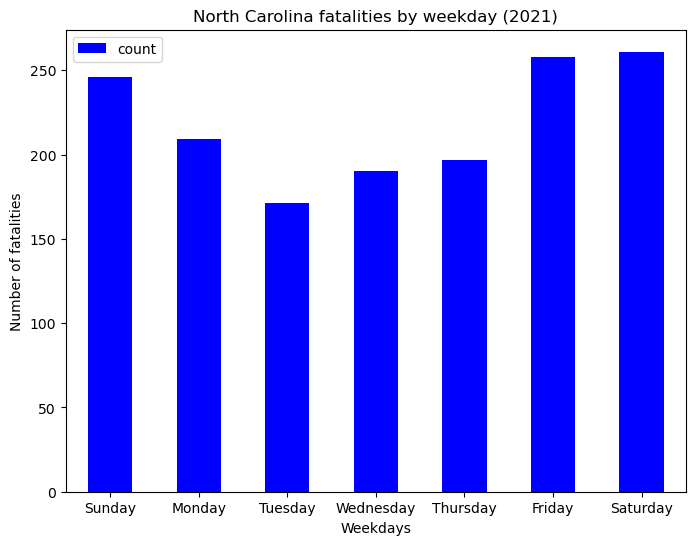

In [22]:
# Configure plot, figsize, title, and axis labels
figure = trimed_df.plot(kind="bar", facecolor="blue", figsize=(8,6),
                                title="North Carolina fatalities by weekday (2021)",
                                xlabel="Weekdays",
                                ylabel="Number of fatalities")

labels = list(trimed_df.weekday)
figure.set_xticklabels(labels, rotation=0)
plt.figure